<a href="https://colab.research.google.com/github/mraihanlos/SKO/blob/main/Tubes_SKO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Muhammad Raihan (1101184176)

Kelas : TT-42-02

No. presensi : 25

**Spesifikasi Perancangan FTTB**

Objek perancangan FTTB :

Topologi : Sentral - ODC - ODP - roset

Jarak dari STO Gambir ke Gedung Raihan (Duren Sawit, Jakarta Timur) = 10 KM atau 10000 M

1 Haspel = 2 KM, membutuhkan 5 haspel dari sentral ke gedung

1 Gedung = 30 Lantai (Splitter 1:32)

1 Lantai = 15 Ruangan (Splitter 1:16)

8 Connector dan 2 spliter

Spesifikasi splitter : 

1.   1 : 32 (1 Buah) = redaman 18 dB (Untuk ODC ke ODP)
2.   1 : 16 (1 Buah) = redaman 15 dB (Untuk ODP ke Roset)

jenis fiber G625D dengan panjang gelombang 1310 nm dengan redaman 0.35 dB/Km

4 Splicer dengan redaman 0.1 dB

Jarak Sentral ke ODP = 10 Km (10000 M)

Jarak ODP ke Roset = 5 x 25 = 125 meter

Total jarak = 10 Km + 125 meter = 10125 meter atau 10.125 Km

In [36]:
import math as m
import matplotlib.pyplot as plt
import numpy as np

In [74]:
#Convert
NtL = lambda x : 10 * np.log10(x)
LtN = lambda x : 10**(x/10)

#dayaterima (Pr)

d= np.arange(0.125,10.125,1) #Jarak (Km)
l_fib = 0.35 * d #Redaman fiber
n_splc = 4 #jumlah Splicer
l_splc = 0.1 * n_splc #Redaman Splicer dikali jumlah splicer (dB)
n_con = 8 #jumlah konektor
l_con = 0.3 * n_con #Redaman konektor dikali jumlah konektor (dB)
l_splt = 15 + 18 #Redaman Splitter 1:16 dan 1:32 (dB)
pt = 5 #dBm

#SNR

R = 0.85 #Responsifitas (A/W)
M = -0.23 #Tambahan daya sinyal (db)
lm = 3 #Margin (dB)
q = 1.6*10**-19 #Muatan
id = 2*10**-7 #Arus gelap (Ampere)
B = 8*10**9 #Bandwith
F = 1 #noise figure
K = 1.38*10**-23 #k.boltzman
teff = 290 #Suhu (kelvin)
RL = 50 #Resistansi Ekivalen


In [76]:
def PR(pt,d,l_fib,n_splc,l_splc,n_con,l_con,l_splt,lm):
  RT = l_fib + l_splc + l_con + l_splt + lm
  pr = pt - RT
  return pr
pr = PR(pt,d,l_fib,n_splc,l_splc,n_con,l_con,l_splt,lm)
print(pr)

[-33.84375 -34.19375 -34.54375 -34.89375 -35.24375 -35.59375 -35.94375
 -36.29375 -36.64375 -36.99375]


In [78]:
#Arus primer
def ap(pr):
  pr_num = LtN(pr)
  ip = pr_num * R
  return ip
ip = ap(pr)
#print(ip)

#BDC
def bdc(q,id,B,M,F):
  BDC = 2*q*id*B*M*M*F
  return BDC
BDC = bdc(q,id,B,M,F)
#print(BDC)

#SN (shot noise)
def sn(q,ip,B,M,F):
  SN = 2*q*ip*B*M*M*F
  return SN
SN = sn(q,ip,B,M,F)
#print(SN)

#NT (noise thermal)
def nt(K,teff,B,RL):
  NT = (4*K*teff*B)/RL
  return NT
NT = nt(K,teff,B,RL)
#print(NT)

#SNR (signal noise ratio)
def snr(BDC,SN,NT,M,ip):
  SNR = ((ip)**2 * M**2)/(BDC + SN + NT)
  SNR1 = NtL(SNR) #dalam dB 
  return SNR1
SNR1 = snr(BDC,SN,NT,M,ip)
print(SNR1) #dB

[33.97100721 33.27713479 32.58279559 31.88802464 31.1928544  30.49731497
 29.80143423 29.10523801 28.40875022 27.71199301]


In [79]:
#Q-Faktor
def qf(SNR1):
  qf = 10**(SNR1/20)
  return qf
QF = qf(SNR1)
print(QF)

[49.95171008 46.11654251 42.5735416  39.30078563 36.27794851 33.48619087
 30.90805749 28.52738086 26.32919075 24.29962942]


In [80]:
def ber(QF):
  phi = 3.14159
  BER = (1/(QF*np.sqrt(2*phi)))*(np.exp(-QF**2/2))
  return BER
BER = ber(QF)
print(BER)

[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 1.80323904e-288 3.83194307e-246 4.65948847e-210 2.68370915e-179
 4.44935875e-153 9.90711334e-131]


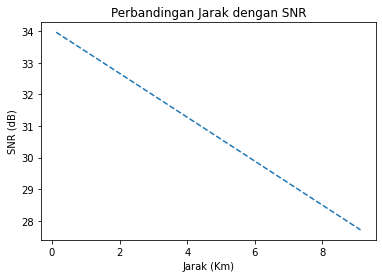

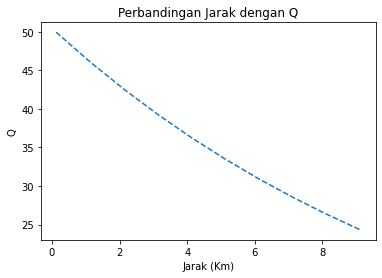

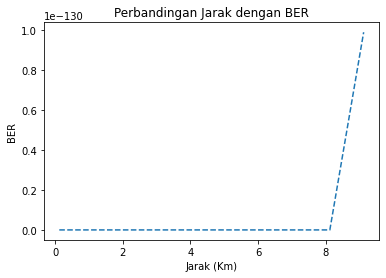

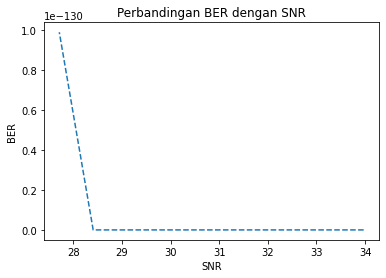

In [85]:
def graph_snr():
  plt.figure()
  plt.plot(d,SNR1,'--')
  plt.title('Perbandingan Jarak dengan SNR')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('SNR (dB)')
  plt.show()

def graph_Q():
  plt.figure()
  plt.plot(d,QF,'--')
  plt.title('Perbandingan Jarak dengan Q')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('Q')
  plt.show()

def graph_BER():
  plt.figure()
  plt.plot(d,BER,'--')
  plt.title('Perbandingan Jarak dengan BER')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('BER')
  plt.show()

def graph_SNRB():
  plt.figure()
  plt.plot(SNR1,BER,'--')
  plt.title('Perbandingan BER dengan SNR')
  plt.xlabel('SNR')
  plt.ylabel('BER')
  plt.show()

graph_snr()
graph_Q()
graph_BER()
graph_SNRB()